Problem 1:

Question 1. a)

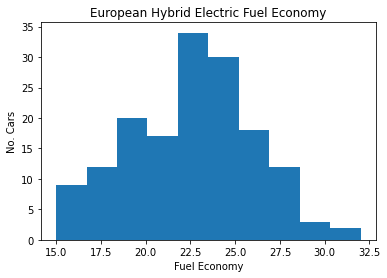

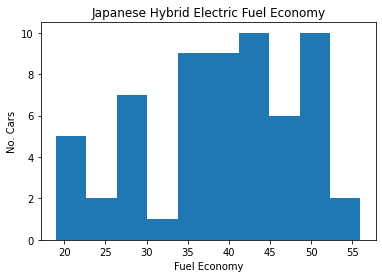

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Alternative Fuel Vehicles US.csv")

european = ['Land Rover','Van Hool', 'Karma', 'COBUS Industries', 'Audi', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Mini', 'Porsche', 'Volvo', 'Volkswagen', 'Bentley Motors', 'Ferrari', 'Global']
japanese = ['Hino', 'Izuzu', 'FUSO','Mazda','Nissan', 'Subaru', 'Honda', 'Toyota', 'Lexus','Acura', 'Mitsubishi']

euroVehicles = data[(data['Manufacturer'].isin(european)) & (data['Fuel'] == 'Hybrid Electric')]
japVehicles = data[(data['Manufacturer'].isin(japanese)) & (data['Fuel'] == 'Hybrid Electric')]

euroFuelVals = euroVehicles['Conventional Fuel Economy Combined'].dropna().to_numpy()
euroNames = euroVehicles['Model'].to_numpy()

japFuelVals = japVehicles['Conventional Fuel Economy Combined'].to_numpy()
japNames = japVehicles['Model'].to_numpy()

plt.hist(euroFuelVals, bins=10);
plt.xlabel("Fuel Economy")
plt.ylabel("No. Cars")
plt.title("European Hybrid Electric Fuel Economy")
plt.show()
plt.hist(japFuelVals, bins=10);
plt.xlabel("Fuel Economy")
plt.ylabel("No. Cars")
plt.title("Japanese Hybrid Electric Fuel Economy")
plt.show()





From these two histograms we can see from the scale that Japan produces many more cars with a significantly higher fuel economy. The range of fuel economy values goes all the way up to 55 with a large amount of cars between 35-55. Whereas, with the european cars, the top end of the range is around 32 and the majority of vehicles are around the 20-25 range for fuel economy.

Question 1. b)

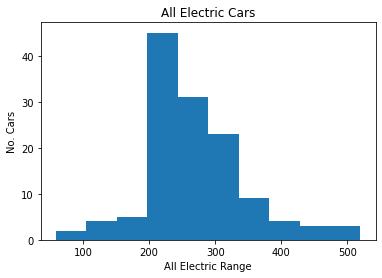

In [146]:
electricOnly = data[data['Fuel'] == "Electric"]
electricOnly = electricOnly.sort_values('All-Electric Range', ascending=False)
tenPercent = round(electricOnly.shape[0]/10)
electricOnly.head(tenPercent).to_csv(path_or_buf="TopTenElectric.csv")
plt.hist(electricOnly['All-Electric Range'], bins=10);
plt.xlabel("All Electric Range")
plt.ylabel("No. Cars")
plt.title("All Electric Cars")
plt.show()


Question 2

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

dataClean = data.dropna(subset='Conventional Fuel Economy Combined')

x = dataClean.loc[:,['Category','Manufacturer','Conventional Fuel Economy City','Conventional Fuel Economy Highway','Conventional Fuel Economy Combined','Engine Size']]

european = ['Land Rover','Van Hool', 'Karma', 'COBUS Industries', 'Audi', 'BMW', 'Jaguar', 'Mercedes-Benz', 'Mini', 'Porsche', 'Volvo', 'Volkswagen', 'Bentley Motors', 'Ferrari', 'Global']
asian = ['Hino', 'Izuzu', 'FUSO','Mazda','Nissan', 'Subaru', 'Honda', 'Toyota', 'Lexus','Acura', 'Mitsubishi', 'Kia', 'Hyundai']

x.loc[x['Manufacturer'].isin(european), 'Manufacturer'] = 'European'
x.loc[x['Manufacturer'].isin(asian), 'Manufacturer'] = 'Asian'
x.loc[(x['Manufacturer']!= 'European') & (x['Manufacturer'] != 'Asian'), 'Manufacturer'] = 'American'

y = dataClean.iloc[:,4]

#One hot encoding
enc = OneHotEncoder()
enc.fit(x[["Category"]])
x = enc.fit_transform(x[["Category"]])

acc = []
for i in range(20):
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

    clf = LogisticRegression()
    clf.fit(xtrain, ytrain)
    yhat = clf.predict(xtest)
    score = clf.predict_proba(xtest)

    acc.append(clf.score(x,y))

print(sum(acc)/len(acc))




0.64009009009009


Part a)
There were three important steps in pre-processing the data.
Firstly, the data needed to be cleaned. This meant removing all rows with null and empty values from the Conventional Fuel Economy Combined column. This was done using the dropna function.
Next, the manufacturers needed to be simplified into Country categories. For this I used the loc function to replace values that appeared in lists of manufacturers with the name of the region they were from.
Lastly, the category column needed to be encoded with a number so that the logistic regression algorithm could use that data. For this, sklearn's OneHotEncoder function was used to replace category names with a numerical value to be processed.

Part b)
After experimenting with differnt train/test sizes, the most accurate marginally was around 0.2 for test size. This size resulted in an average accuracy of between 63.5-64.5% which was the highest accuracy scores achieved across different test/train split sizes.

In [140]:
from sklearn.neural_network import MLPClassifier

acc = []
for i in range(20):
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

    mlp = MLPClassifier(hidden_layer_sizes=(30,))
    mlp.fit(xtrain, ytrain)
    yhat = mlp.predict(xtest)
    score = mlp.predict_proba(xtest)

    acc.append(mlp.score(x,y))

print(sum(acc)/len(acc))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

0.6409909909909909


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Part c) For the MLP classifier, after experimenting with many test/train values as well as hidden layer sizes, the best results achieved were with a hidden layer size of 30 and a test/train split of 0.3. The accuracy results similarly ranged between 63.5 and 64.5%.

Problem 2:

Question 1. Due to the number of categorical variables as well as the categorical values being non-binary, it makes more sense and is more suitable to use label encoding to transform the categorical variables to numerical. This allows the dataset to remain readable and simpler as opposed to one hot encoding where many new variables would be added.

In [150]:
heartData = pd.read_csv("heart.csv")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
heartData['Sex'] = le.fit_transform(heartData['Sex'])
heartData['ChestPainType'] = le.fit_transform(heartData['ChestPainType'])
heartData['RestingECG'] = le.fit_transform(heartData['RestingECG'])
heartData['ExerciseAngina'] = le.fit_transform(heartData['RestingECG'])
heartData['ST_Slope'] = le.fit_transform(heartData['ST_Slope'])

heartData.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,2,0
1,49,0,2,160,180,0,1,156,1,1.0,1,1
2,37,1,1,130,283,0,2,98,2,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,1,0.0,2,0


Question 2.

In [199]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics

heartX = heartData.iloc[:,:11]
heartY = heartData.iloc[:,11].to_numpy()

auc_table = []
acc_table = []

for i in range(10):
    xtrain, xtest, ytrain, ytest = train_test_split(heartX, heartY,test_size=0.25)

    gnb = GaussianNB().fit(xtrain,ytrain)

    yhat = gnb.predict(xtest)
    score = gnb.predict_proba(xtest)

    score = score[:,1]

    auc_table.append(metrics.roc_auc_score(ytest,score))
    acc_table.append(metrics.accuracy_score(ytest,yhat))

table = pd.DataFrame(list(zip(auc_table, acc_table)), columns=['AUC Score','Accuracy Score'])
table.head(10)

,AUC Score,Accuracy Score
0,0.904092,0.839130
1,0.923159,0.860870
2,0.910552,0.830435
3,0.899853,0.843478
4,0.917149,0.843478
5,0.909001,0.834783
6,0.877482,0.804348
7,0.898326,0.817391
8,0.904172,0.821739
9,0.910482,0.830435


Part 3. To predict a diagnosis with incomplete data, we can impute the missing values. This can be done using the SimpleImputer in sklearn.

In [203]:
from sklearn.impute import SimpleImputer
import numpy as np


imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(heartX)
SimpleImputer()

testData = [[np.nan,1,0,107,0,1,1,130,np.nan,0.4,2],[65,np.nan,0,99,0,np.nan,1,150,np.nan,0.4,2]]

imputedTestData = imp.transform(testData)
print(imputedTestData)

[[ 53.51089325   1.           0.         107.           0.
    1.           1.         130.           0.98910675   0.4
    2.        ]
 [ 65.           0.78976035   0.          99.           0.
    0.23311547   1.         150.           0.98910675   0.4
    2.        ]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


This entry now is filled with data and can be predicted using the model trained above.

In [216]:
testPredict = gnb.predict(imputedTestData)

print(testPredict)

[1 1]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


These two demo test entries are predicted to both have heart disease.

Part 4.

In [235]:
from sklearn.neighbors import KNeighborsClassifier

k = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
K = 5

acc1 = []
acc2 = []
auc1 = []
auc2 = []
for i in range(15):
    xtrain, xtest, ytrain, ytest = train_test_split(heartX, heartY,test_size=0.25)

    knn = KNeighborsClassifier(n_neighbors = K, weights = "uniform")
    wnn = KNeighborsClassifier(n_neighbors = K, weights = "distance")

    knn.fit(xtrain,ytrain)
    wnn.fit(xtrain,ytrain)

    yhat1 = knn.predict(xtest)
    yhat2 = knn.predict(xtest)

    score1 = knn.predict_proba(xtest)
    score2 = knn.predict_proba(xtest)

    score1 = score1[:,1]
    score2 = score2[:,1]

    acc1.append(metrics.accuracy_score(ytest,yhat1))
    acc2.append(metrics.accuracy_score(ytest,yhat2))

    auc1.append(metrics.roc_auc_score(ytest,score1))
    auc2.append(metrics.roc_auc_score(ytest,score2))
    K += i

knntable = pd.DataFrame(list(zip(k,acc1, acc2, auc1, auc2)), columns=['K','KNN Accuracy', 'WNN Accuracy', 'KNN AUC', 'WNN AUC'])
knntable.head(15)

,K,KNN Accuracy,WNN Accuracy,KNN AUC,WNN AUC
0,5,0.647826,0.647826,0.703654,0.703654
1,6,0.686957,0.686957,0.753220,0.753220
2,7,0.721739,0.721739,0.775908,0.775908
3,8,0.730435,0.730435,0.825054,0.825054
4,9,0.647826,0.647826,0.744315,0.744315
5,10,0.743478,0.743478,0.778048,0.778048
6,11,0.682609,0.682609,0.745219,0.745219
7,12,0.656522,0.656522,0.727040,0.727040
8,13,0.708696,0.708696,0.772424,0.772424
9,14,0.678261,0.678261,0.756439,0.756439


Using the KNN model we find some slightly more accurate results into the high 70%s and the low 80%s in terms of area under the curve as well as above 70% accyuracy scores for different values of K, an improvement over the other models trained and tested above.